# Price Rate of Change indicator ( ROC)

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:

# from datetime import date

from mod_my_utils.read_write_data import *


In [13]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [14]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
print(start_date)
print(end_date)
print(symbol)

1/1/2010
1/1/2015
HDFC


In [15]:
stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

stock name HDFC


In [16]:
data = stock_data[["Adj Close"]].copy()
data.columns = ["price"]
data.head(5)

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772614
2010-01-06,445.906006
2010-01-07,437.604248
2010-01-08,429.980530


### Rate of change

### ROC with a period

In [17]:
data.head()

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772614
2010-01-06,445.906006
2010-01-07,437.604248
2010-01-08,429.980530


In [18]:
period = 5

In [19]:
data['diff' + str(period)] = data['price'].diff(periods= period)
data['shift' + str(period)] = data['price'].shift(periods=period)
data.head(20)

,price,diff5,shift5
Date,,,
2010-01-04,442.267761,NaN,NaN
2010-01-05,443.772614,NaN,NaN
2010-01-06,445.906006,NaN,NaN
2010-01-07,437.604248,NaN,NaN
2010-01-08,429.980530,NaN,NaN
2010-01-11,429.988800,-12.278961,442.267761
2010-01-12,423.299377,-20.473236,443.772614
2010-01-13,420.694794,-25.211212,445.906006
2010-01-14,417.560944,-20.043304,437.604248


In [20]:
data['roc' + str(period)] = data['diff' + str(period)] / data['shift' + str(period)]
data.head(20)

,price,diff5,shift5,roc5
Date,,,,
2010-01-04,442.267761,NaN,NaN,NaN
2010-01-05,443.772614,NaN,NaN,NaN
2010-01-06,445.906006,NaN,NaN,NaN
2010-01-07,437.604248,NaN,NaN,NaN
2010-01-08,429.980530,NaN,NaN,NaN
2010-01-11,429.988800,-12.278961,442.267761,-0.027764
2010-01-12,423.299377,-20.473236,443.772614,-0.046135
2010-01-13,420.694794,-25.211212,445.906006,-0.056539
2010-01-14,417.560944,-20.043304,437.604248,-0.045802


In [21]:
data['diff' + str(period)] = data['price'].diff(periods=period)
data['shift' + str(period)] = data['price'].shift(periods=period)
data['roc' + str(period)] = data['diff' + str(period)]/ data['shift' + str(period)]
roc = data['price'].diff(periods=5) / data['price'].shift(periods=period)
data.head(20)

,price,diff5,shift5,roc5
Date,,,,
2010-01-04,442.267761,NaN,NaN,NaN
2010-01-05,443.772614,NaN,NaN,NaN
2010-01-06,445.906006,NaN,NaN,NaN
2010-01-07,437.604248,NaN,NaN,NaN
2010-01-08,429.980530,NaN,NaN,NaN
2010-01-11,429.988800,-12.278961,442.267761,-0.027764
2010-01-12,423.299377,-20.473236,443.772614,-0.046135
2010-01-13,420.694794,-25.211212,445.906006,-0.056539
2010-01-14,417.560944,-20.043304,437.604248,-0.045802


### Method for ROC

In [9]:
data.head()

,price,diff5,shifted_price5,roc5,shift5
Date,,,,,
2020-01-01,2359.273438,NaN,NaN,NaN,NaN
2020-01-02,2390.727783,NaN,NaN,NaN,NaN
2020-01-03,2379.144531,NaN,NaN,NaN,NaN
2020-01-06,2310.953125,NaN,NaN,NaN,NaN
2020-01-07,2340.953369,NaN,NaN,NaN,NaN


In [22]:
def get_roc(data, period):
    """
    Rate of change indicator 
    This method create roc values
    Parameters
    -------------
    Input: 
    - Data frame with price column
    - period
    return: Data frame with price, diff, ROC of n period
    """
    roc_data = pd.DataFrame(index=data.index)
    roc_data['price'] = data['price']
    roc_data['roc' + str(period)] = roc_data['price'].diff(periods=period) / roc_data['price'].shift(periods=period)
    return roc_data

## To generate signals using ROC

In [23]:
roc = get_roc(data[['price']], period)

In [24]:
roc.head(20)

,price,roc5
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,NaN
2010-01-06,445.906006,NaN
2010-01-07,437.604248,NaN
2010-01-08,429.980530,NaN
2010-01-11,429.988800,-0.027764
2010-01-12,423.299377,-0.046135
2010-01-13,420.694794,-0.056539
2010-01-14,417.560944,-0.045802


<AxesSubplot:xlabel='Date'>

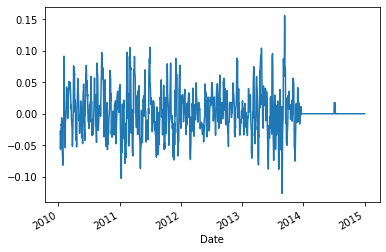

In [26]:
roc['roc' + str(period)].plot()

### Signal generation

In [27]:
buy_threshold = -0.1
sell_threshold = 0.1

In [29]:
def get_roc_signal(data, period, buy_threshold, sell_threshold):
    """
    Get ROC signals
    Input: data frame with price, ROC values for given period 
    Ouput: price, buy sell signals
    """
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['price']
    signals['buy']= 0.0
    signals['sell']= 0.0
    signals['buy'] = np.where(data['roc' + str(period)] < buy_threshold, -1.0, 0.0)
    signals['sell'] = np.where(data['roc' + str(period)] > sell_threshold, 1.0, 0.0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy']==-1.0,['buy']] = 0.0 
    signals.loc[signals['sell']== 1.0,['sell']] = 0.0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price', 'buy_sell']]

In [30]:
roc.head()

,price,roc5
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,NaN
2010-01-06,445.906006,NaN
2010-01-07,437.604248,NaN
2010-01-08,429.980530,NaN


In [31]:
signals = get_roc_signal(roc, period, buy_threshold, sell_threshold)

In [33]:
signals.head(30)

,price,buy_sell
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,0.0
2010-01-06,445.906006,0.0
2010-01-07,437.604248,0.0
2010-01-08,429.980530,0.0
2010-01-11,429.988800,0.0
2010-01-12,423.299377,0.0
2010-01-13,420.694794,0.0
2010-01-14,417.560944,0.0


<AxesSubplot:xlabel='Date'>

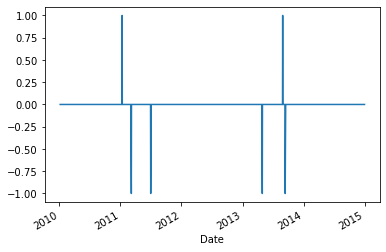

In [34]:
signals.buy_sell.plot()

<AxesSubplot:xlabel='Date'>

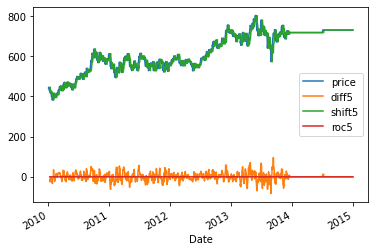

In [35]:
data.plot()

In [47]:
def plot_roc_buy_sell(data, signals, period):
    graph = plt.figure(figsize = (15,15))
    sp1 = graph.add_subplot(311)
    sp2 = graph.add_subplot(312)
    sp3 = graph.add_subplot(312)
    data["roc" + str(period)].plot(ax=sp1,title = "ROC Plot",color = "r", linewidth = 0.5)
    sp1.axhline(y= 0.1, color = "b", lw = 7.)
    sp1.axhline(y= -0.1, color = "g", lw = 7.)
    sp1.axhline(y= 0, color = "k", lw = 5.)

    signals["price"].plot(ax = sp3)
    sp3.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1], "^", markersize = 12, color = "k")
    sp3.plot(signals.loc[signals.buy_sell ==-1].index, signals.price[signals.buy_sell ==-1], "v", markersize = 12, color = "m")
    plt.show() 

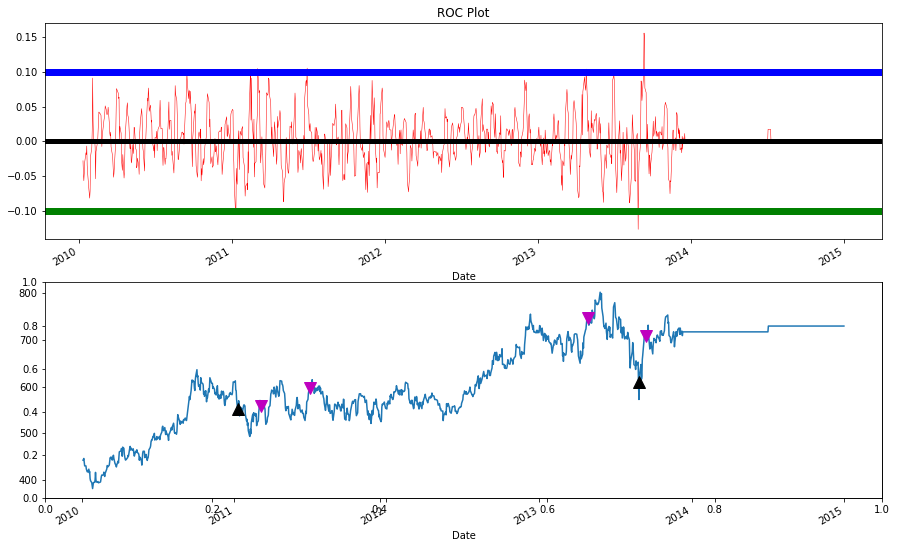

In [48]:
plot_roc_buy_sell(data, signals, period)